In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2023-10-08 18:36:25.459523: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-08 18:36:25.492466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier6.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier6.tflite'

In [3]:
NUM_CLASSES = 14

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                294       
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
Total params: 1364 (5.33 KB)
Trainable params: 1364 (5.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/40 [====================>.........] - ETA: 0s - loss: 2.6780 - accuracy: 0.1455  
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier6.hdf5
40/40 [==============================] - 2s 9ms/step - loss: 2.6503 - accuracy: 0.1555 - val_loss: 2.5149 - val_accuracy: 0.2107
Epoch 2/1000
29/40 [====================>.........] - ETA: 0s - loss: 2.5025 - accuracy: 0.2069
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier6.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 2.4876 - accuracy: 0.2086 - val_loss: 2.3638 - val_accuracy: 0.2172
Epoch 3/1000
 1/40 [..............................] - ETA: 0s - loss: 2.4260 - accuracy: 0.1562

/home/pavanmanishd/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/40 [============================>.] - ETA: 0s - loss: 2.3230 - accuracy: 0.2432
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier6.hdf5
40/40 [==============================] - 0s 5ms/step - loss: 2.3230 - accuracy: 0.2431 - val_loss: 2.1387 - val_accuracy: 0.3308
Epoch 4/1000
25/40 [=================>............] - ETA: 0s - loss: 2.1345 - accuracy: 0.2969
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier6.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 2.0937 - accuracy: 0.3078 - val_loss: 1.8044 - val_accuracy: 0.4302
Epoch 5/1000
26/40 [==================>...........] - ETA: 0s - loss: 1.8917 - accuracy: 0.3552
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier6.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 1.8579 - accuracy: 0.3646 - val_loss: 1.5082 - val_accuracy: 0.5178
Epoch 6/1000
30/40 [=====================>........] - ETA: 0s - loss: 1.6739 - accuracy: 0.4307
Epoch 6: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/14 [=>............................] - ETA: 0s - loss: 0.1053 - accuracy: 0.9844

14/14 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9680


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 60ms/step
[5.0943759e-22 3.3293042e-31 1.4936570e-07 8.0584966e-10 1.1179040e-07
 7.3344114e-07 9.6987504e-05 1.9939237e-12 5.6529564e-12 4.6500463e-24
 1.2043639e-13 9.9990201e-01 7.9528375e-09 6.6440859e-31]
11


53/53 [==============================] - 0s 1ms/step


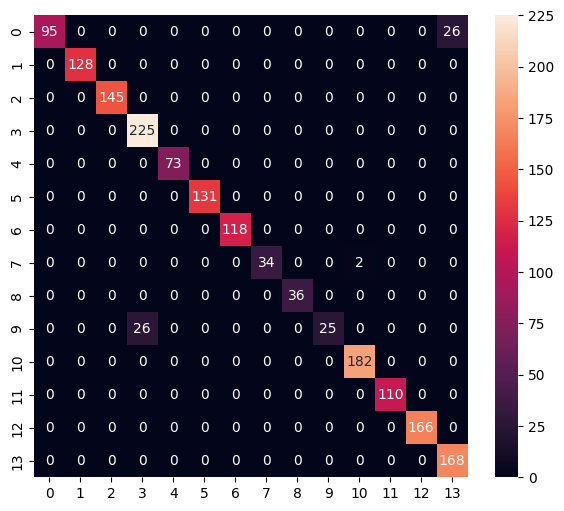

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       121
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00       145
           3       0.90      1.00      0.95       225
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00       131
           6       1.00      1.00      1.00       118
           7       1.00      0.94      0.97        36
           8       1.00      1.00      1.00        36
           9       1.00      0.49      0.66        51
          10       0.99      1.00      0.99       182
          11       1.00      1.00      1.00       110
          12       1.00      1.00      1.00       166
          13       0.87      1.00      0.93       168

    accuracy                           0.97      1690
   macro avg       0.98      0.94      0.96      1690
weighted avg       0.97      0.97      0.97      1690



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/pavanmanishd/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpb6vz0ktw/assets


INFO:tensorflow:Assets written to: /tmp/tmpb6vz0ktw/assets
2023-10-08 18:37:23.939093: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-10-08 18:37:23.939129: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-10-08 18:37:23.945617: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpb6vz0ktw
2023-10-08 18:37:23.946377: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-10-08 18:37:23.946391: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpb6vz0ktw
2023-10-08 18:37:23.958667: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-10-08 18:37:23.959478: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-10-08 18:37:24.060000: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

7544

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 38 µs, sys: 5 µs, total: 43 µs
Wall time: 45.8 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0943557e-22 3.3293037e-31 1.4936599e-07 8.0584961e-10 1.1179018e-07
 7.3344188e-07 9.6987686e-05 1.9939235e-12 5.6529560e-12 4.6500282e-24
 1.2043615e-13 9.9990201e-01 7.9528668e-09 6.6440845e-31]
11
